T2: 'Churn' attribute analysis
0    2850
1     483
Name: Churn, dtype: int64


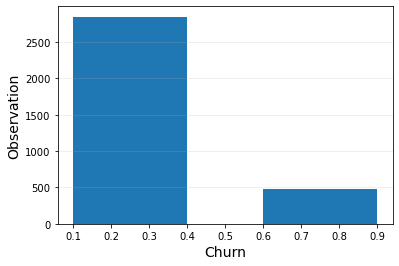


T3
[0.90419162 0.91317365 0.9251497  0.91891892 0.93693694 0.91891892
 0.90690691 0.90990991 0.90990991 0.93693694]
Result: 92% accuracy with standard deviation of 0.01


In [14]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 

import os

#print(os.getcwd())
 
# Load dataset
calls_data = pd.read_csv('CallsData.csv')
contract_data = pd.read_csv('ContractData.csv')


# Merge on Area code and Phone 
df = pd.merge(calls_data, contract_data, how="inner", on=["Area Code","Phone"], sort=False)

# Churn to nominal
df['Churn'] = df['Churn'].astype('category')

## T2

print('T2: \'Churn\' attribute analysis')

# desbalanceamento - value_counts
print(df['Churn'].value_counts())

## OU
# print(df.groupby(by=['Churn']).count())

# desbalanceamento - graficamente

fig, ax1 = plt.subplots(1,1)
card, _, _ = ax1.hist(df['Churn'], bins=2, rwidth=0.6)
ax1.set_ylabel('Observation', fontsize=14)
ax1.set_xlabel('Churn', fontsize=14)
ax1.grid(axis='y', alpha=0.25)
plt.show()


print()

## T3

print('T3')

X = df.drop(['Churn', 'Phone', 'State'], axis=1)
y = df['Churn'].to_frame()

clf = DecisionTreeClassifier(random_state=2021)
scores = cross_val_score(clf, X, y, cv=10)
print(scores)
print('Result: %0.0F%% accuracy with standard deviation of %0.2F' % (scores.mean() * 100, scores.std()))



